In [ ]:
# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

# Regression

In [ ]:
#Read data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Boston.csv'
                ,index_col=0)
df

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
1    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
2    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
3    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
4    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
5    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
1       15.3  396.90   4.98  24.0  
2       17.8  396.90   9.14  21.6  
3       17.8  392.83   4.03  34.7  
4       18.7  394.63   2.94  33.4  
5       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
502     21.0  391.99   9.67  22.4  
503     21.0  396.90   9.08  20.6  
504     21.0  396.90   5.64  23.9  
505     21.0  393.45   6.48  22.0  
506     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [5]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

# Model building

In [6]:
x = df.iloc[:,:-1]
y = df['medv']

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
#Evaluating regressor

In [ ]:
xtest

In [ ]:
len(xtrain)

In [8]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
ypred

array([29.686, 26.559, 20.536, 20.556, 19.388, 19.508, 27.745, 19.068,
       20.373, 23.783, 28.027, 30.714, 20.272, 19.908, 20.256, 24.593,
       11.724, 39.938, 24.507, 14.2  , 19.656, 16.625, 24.707, 23.844,
       26.06 ,  9.445, 14.678, 19.774, 42.956, 12.46 , 27.162, 19.294,
       47.957, 16.001, 23.535, 20.71 , 15.592, 33.395, 13.002, 19.472,
       24.919, 23.339, 26.134, 16.259, 16.002, 10.286, 47.993, 11.667,
       21.265, 18.663, 23.937, 21.444, 25.29 , 20.688, 11.412, 23.692,
       11.784, 23.354, 18.713, 42.231, 14.228, 26.619, 12.881, 14.792,
       17.571, 32.107, 42.081, 24.76 , 21.529, 20.154, 24.024,  6.596,
       18.465, 21.451, 19.459, 20.54 , 42.352, 24.87 , 27.837, 34.128,
       17.331, 20.693, 33.752, 11.631, 25.258, 25.755, 14.56 , 24.535,
       19.61 , 17.067, 26.922, 45.681, 15.973, 20.916, 15.346, 20.587,
       24.328, 23.904, 42.376, 20.496, 15.559, 14.942])

In [9]:
r2_score(ytest,ypred)

0.9088144164770408

In [10]:
print('R2 value :', r2_score(ytest, ypred))

R2 value : 0.9088144164770408


In [11]:
mean_squared_error(ytest,ypred)

9.011633176470596

In [12]:
np.sqrt(mean_squared_error(ytest, ypred))

3.001938236618235

In [13]:
print(f"R2 values: {r2_score(ytest,ypred)}")
print(f"MSE: {mean_squared_error(ytest,ypred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest,ypred))}")

R2 values: 0.9088144164770408
MSE: 9.011633176470596
RMSE: 3.001938236618235


In [ ]:
#Visualize the rf

In [14]:
len(rf.estimators_)

100

In [16]:
rf.estimators_[0]

DecisionTreeRegressor(max_features=1.0, random_state=1197388391)

In [ ]:
x.columns

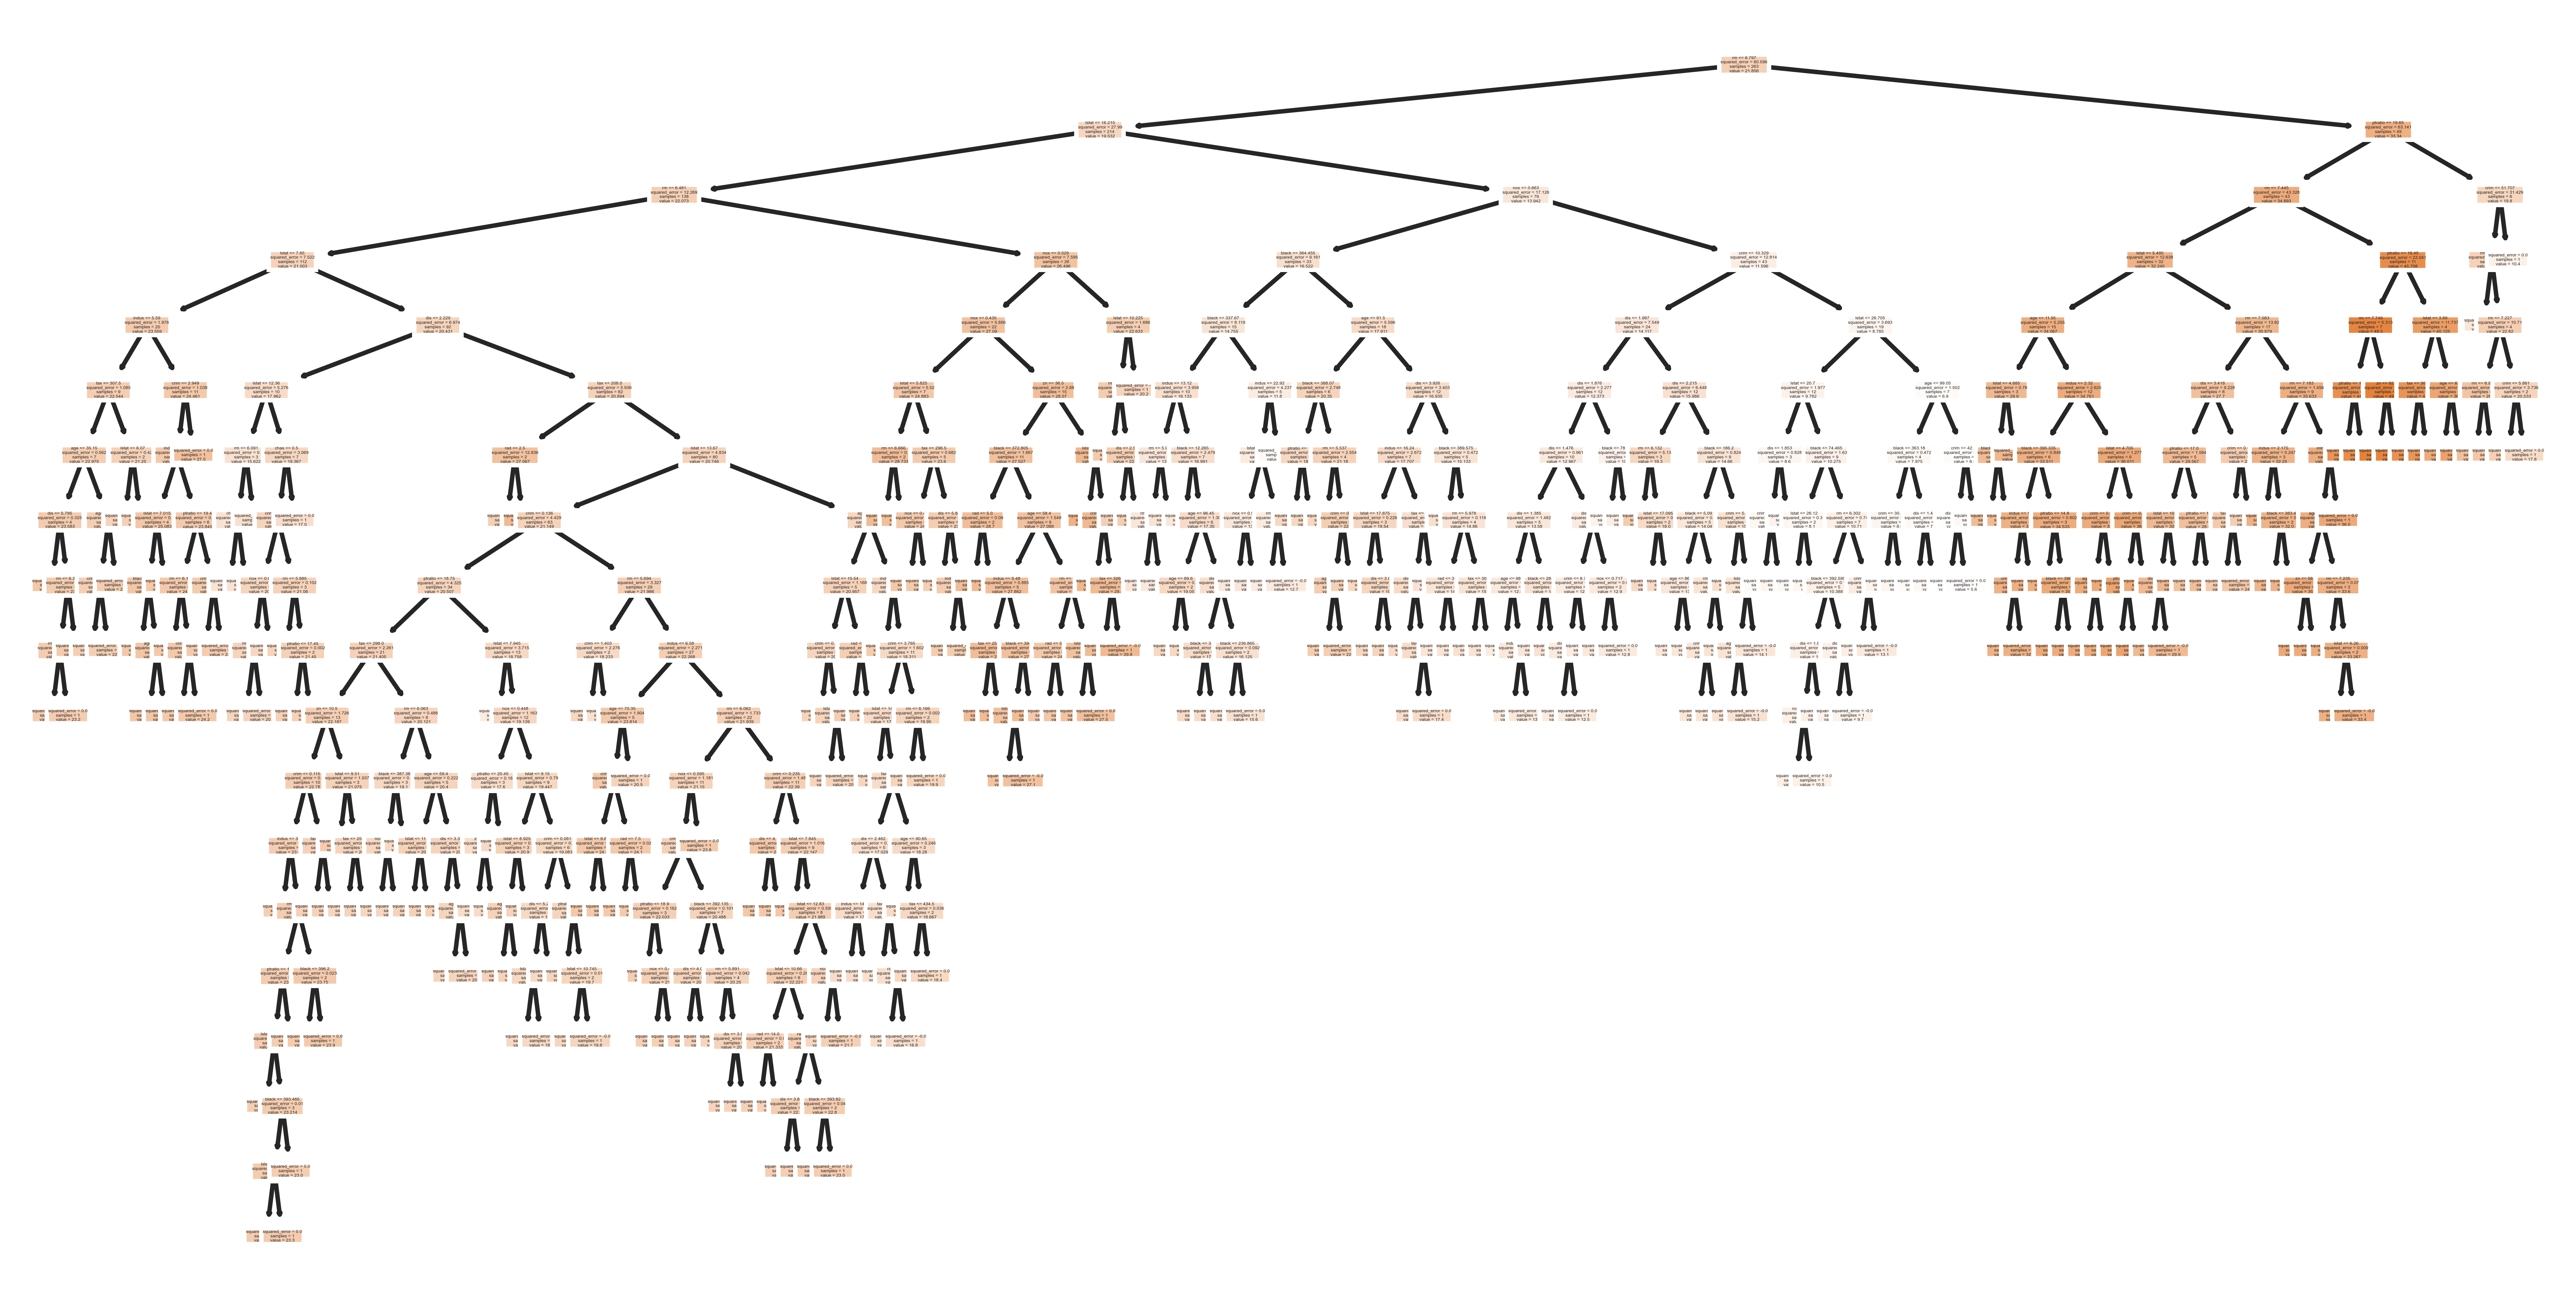

In [19]:
tree.plot_tree(rf.estimators_[5], feature_names=x.columns,
              filled=True)
plt.show()

# Classification

In [ ]:
#Read the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Mobile_price_range.csv')
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

<Axes: xlabel='price_range', ylabel='count'>

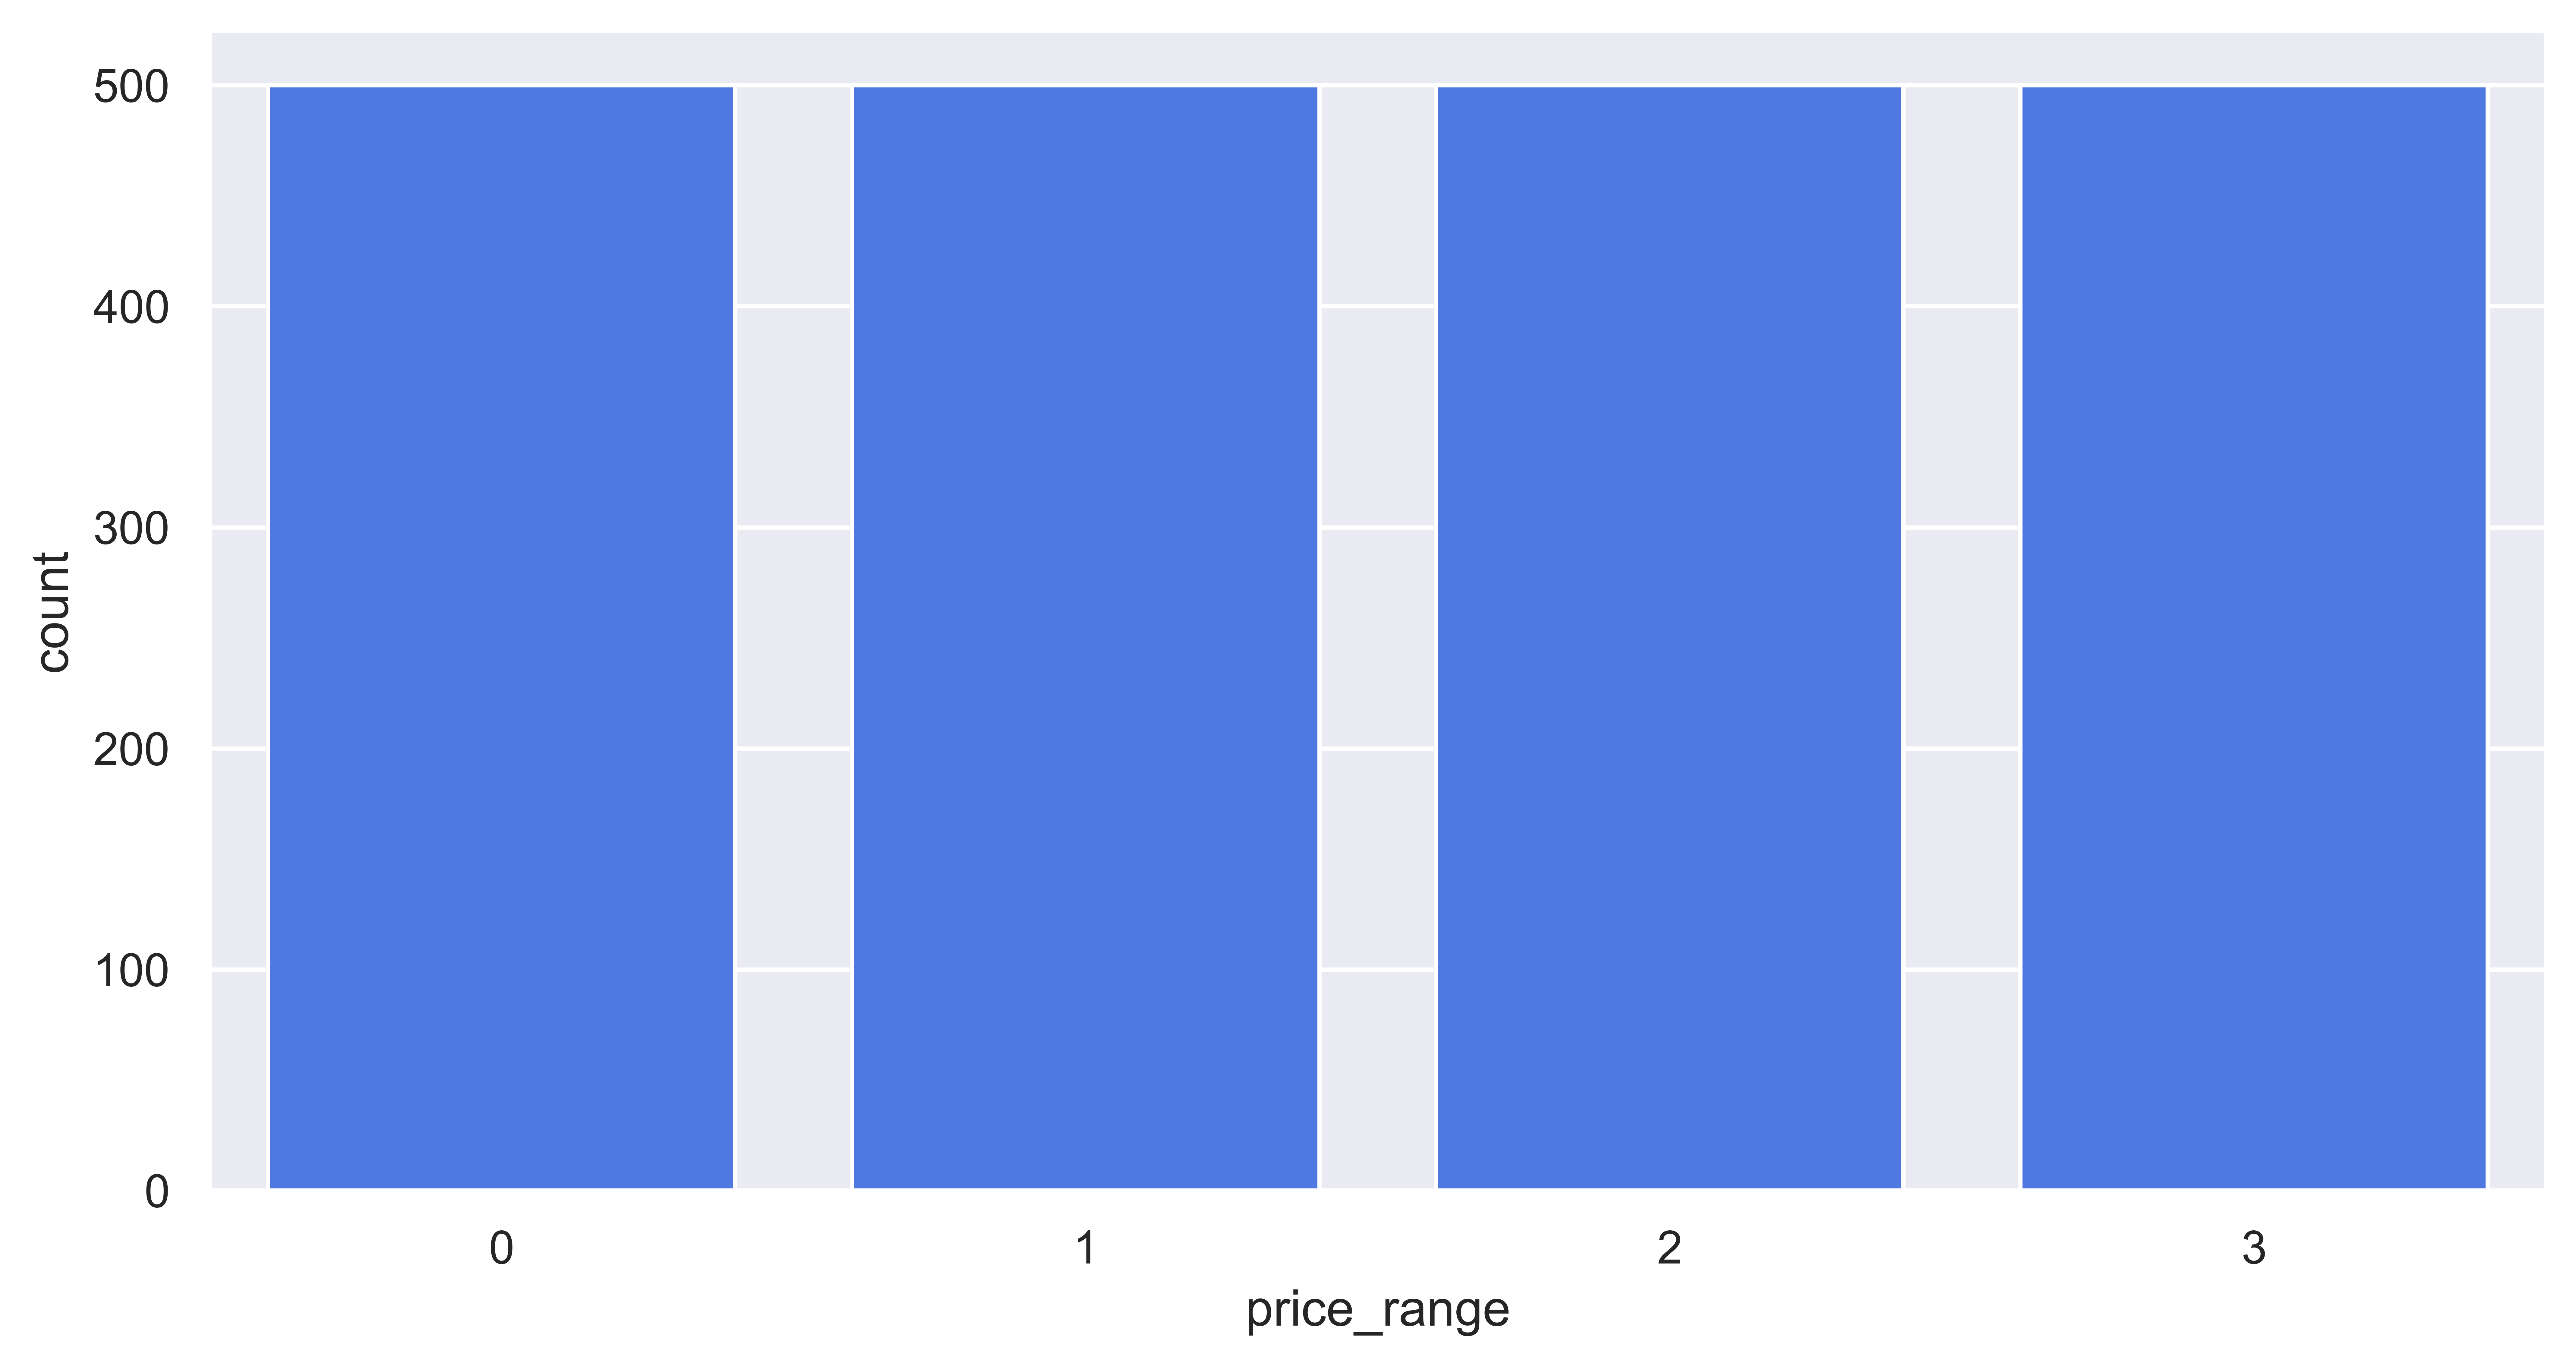

In [3]:
sns.countplot(x = df['price_range'])

In [4]:
df['price_range'].replace([0,1,2,3],['low','medium','high','very high'], inplace=True)

In [5]:
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1       medium  
1             7        1             1     0         high  
2             9        1             1     0         high  
3            11        1             0     0         high  
4            15        1             1     0       medium  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0          low  
1996         16        1             1     1         high  
1997          5        1             1     0    very high  
1998         19        1             1     1          low  
1999          2        1             1     1    very high  

[2000 rows x 21 columns]

In [ ]:
#Evaluate model

In [6]:
x = df.iloc[:,:-1]
y = df['price_range']

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [8]:
xtest

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
674            1034     0          2.6         1   2       1          45   
1699           1002     1          1.8         0   1       0          45   
1282            609     1          0.5         0   4       1          10   
1315           1510     0          0.6         1   1       0          32   
1210            805     1          1.7         1   0       1          58   
...             ...   ...          ...       ...  ..     ...         ...   
400            1266     0          1.9         1   0       1           7   
763            1741     1          1.8         0   0       0          14   
385            1880     1          1.8         0   4       1          18   
1667           1967     0          0.5         0   0       1          46   
1820            665     1          0.7         0   0       1          31   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
674     0.3        190        3   4        182      1293   969    15     1   
1699    0.7        180        7   7        948      1007  1234    19    13   
1282    0.1         81        6   6        113      1524  1905    16     3   
1315    0.7        135        3   8        963      1520   854     8     2   
1210    0.9        168        3  10         81      1544  3397     7     6   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
400     0.2        184        3  12        346      1468  2532    10     5   
763     0.7        143        8   0        730      1895  3387    11     3   
385     0.7        138        3   5         71       699  3333    17    15   
1667    0.6        199        1   7        518      1374  1567    15     2   
1820    0.1        185        5   2        496      1804   690     5     2   

      talk_time  three_g  touch_screen  wifi  
674           7        1             0     0  
1699         18        1             1     0  
1282         18        1             1     1  
1315         10        1             0     1  
1210          2        1             0     0  
...         ...      ...           ...   ...  
400           4        1             1     1  
763           3        1             0     0  
385           7        1             0     0  
1667          7        1             1     0  
1820         15        1             0     0  

[400 rows x 20 columns]

In [9]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)

In [10]:
yp

array(['low', 'low', 'medium', 'low', 'high', 'medium', 'low', 'high',
       'high', 'very high', 'low', 'very high', 'medium', 'medium',
       'very high', 'low', 'low', 'medium', 'medium', 'high', 'very high',
       'very high', 'medium', 'high', 'very high', 'high', 'high',
       'very high', 'high', 'high', 'high', 'medium', 'high', 'low',
       'very high', 'very high', 'low', 'low', 'medium', 'low', 'medium',
       'low', 'high', 'medium', 'low', 'medium', 'high', 'high', 'medium',
       'high', 'high', 'very high', 'medium', 'very high', 'high',
       'very high', 'medium', 'very high', 'very high', 'medium', 'low',
       'high', 'medium', 'very high', 'high', 'medium', 'low', 'high',
       'very high', 'high', 'medium', 'high', 'low', 'very high',
       'very high', 'medium', 'high', 'medium', 'low', 'low', 'low',
       'very high', 'high', 'high', 'very high', 'high', 'high', 'low',
       'medium', 'medium', 'very high', 'low', 'medium', 'medium', 'high',
       '

In [11]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

        high       0.79      0.84      0.81       106
         low       0.91      0.93      0.92        92
      medium       0.81      0.82      0.81        96
   very high       0.96      0.85      0.90       106

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



In [ ]:
#Try to visualize first 5 decision trees.

In [12]:
len(rfc.estimators_)

100

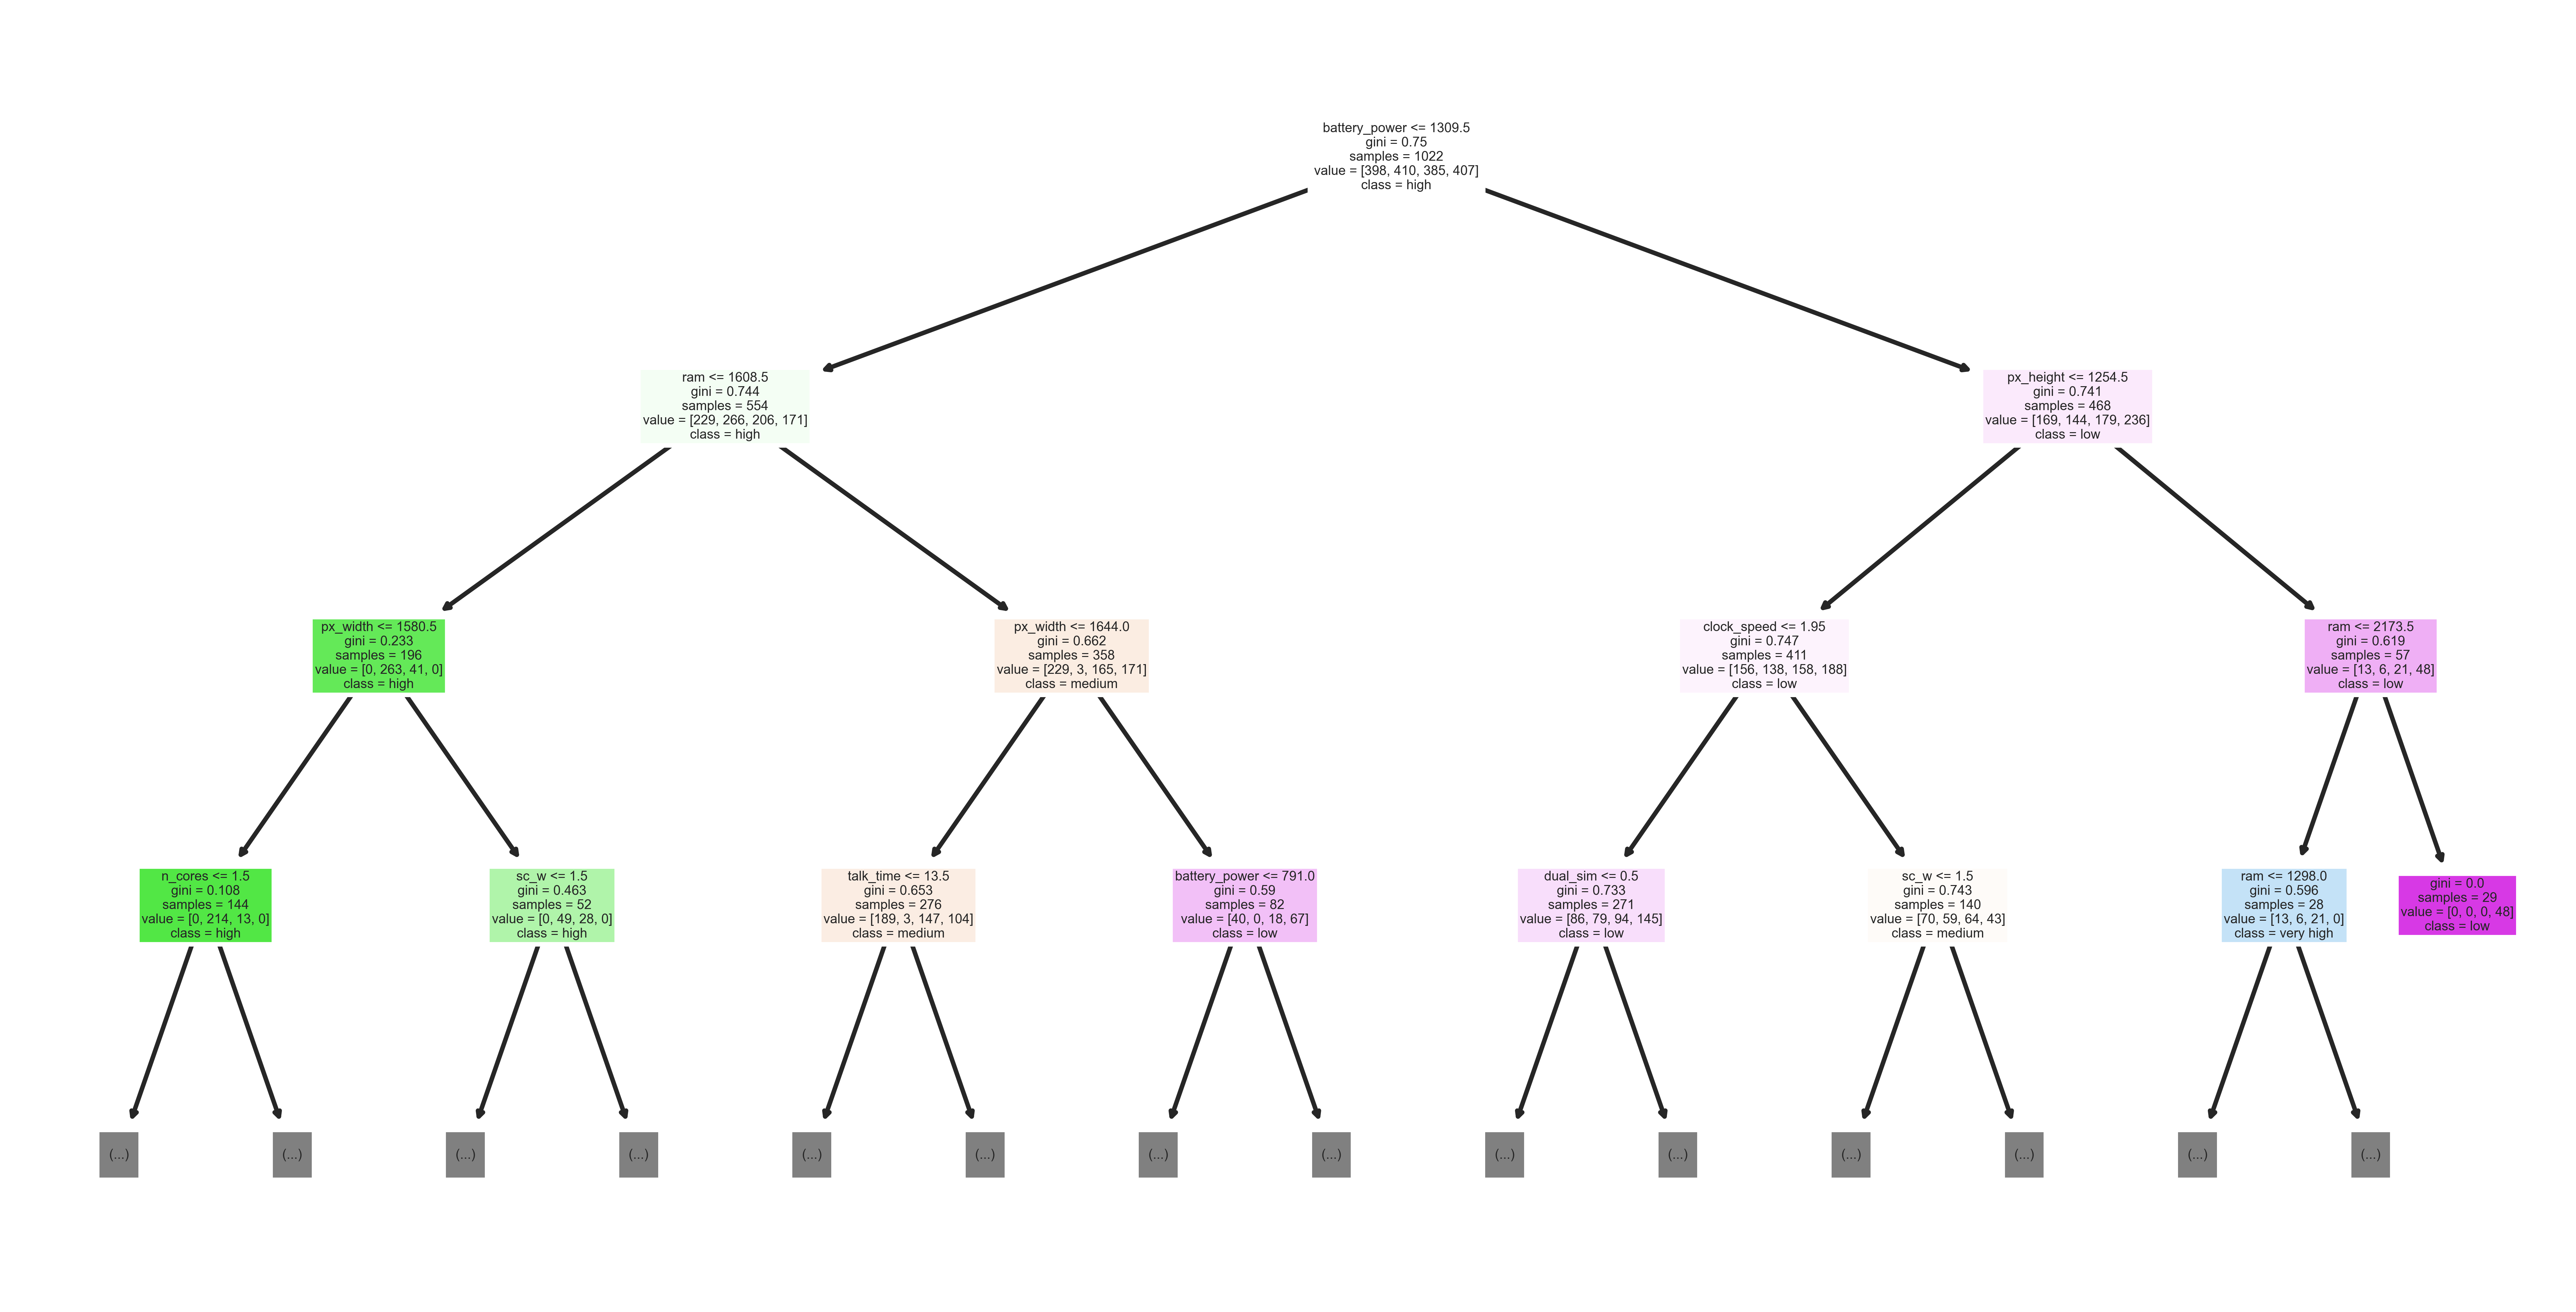

In [13]:
tree.plot_tree(rfc.estimators_[75], feature_names=x.columns,
               class_names=df['price_range'].unique(),
               filled=True , max_depth=3)
plt.show()